In [1]:
#Importing libraries for loading and viewing of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

In [2]:
#Reading the data which is present in 5 folders
Folder0 = pd.read_csv(r"C:\Users\mvsan\Desktop\New folder (2)\AdienceBenchmarkGenderAndAgeClassification\fold_0_data.txt",sep = "\t")
Folder1 = pd.read_csv(r"C:\Users\mvsan\Desktop\New folder (2)\AdienceBenchmarkGenderAndAgeClassification\fold_1_data.txt",sep = "\t")
Folder2 = pd.read_csv(r"C:\Users\mvsan\Desktop\New folder (2)\AdienceBenchmarkGenderAndAgeClassification\fold_2_data.txt",sep = "\t")
Folder3 = pd.read_csv(r"C:\Users\mvsan\Desktop\New folder (2)\AdienceBenchmarkGenderAndAgeClassification\fold_3_data.txt",sep = "\t")
Folder4 = pd.read_csv(r"C:\Users\mvsan\Desktop\New folder (2)\AdienceBenchmarkGenderAndAgeClassification\fold_4_data.txt",sep = "\t")

In [3]:
#The five folder data is added into single folder that Data
Data=pd.concat([Folder0,Folder1,Folder2,Folder3,Folder4],ignore_index=True)

In [4]:
#Checking data info and first & last five records from dataframe.  
Data.info()
Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [5]:
#Cheacking the data last five records of dataframe
Data.tail()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
19365,7153718@N04,11598838386_349a0d4849_o.jpg,2282,None,NaN,596,460,1472,1473,-75,0,30
19366,7153718@N04,11598166203_c70bb34c80_o.jpg,2283,None,NaN,1179,755,331,331,5,0,108
19367,7153718@N04,11598166203_c70bb34c80_o.jpg,2282,None,NaN,1201,1179,293,293,5,0,99
19368,7153718@N04,11598145163_733cb99713_o.jpg,2282,None,NaN,1027,946,408,408,-85,0,49
19369,7153718@N04,11598013005_240c2bc9c7_o.jpg,2282,None,NaN,498,643,772,772,-80,0,111


In [20]:
#Checking Data shape
print(Data.shape)

(19370, 12)


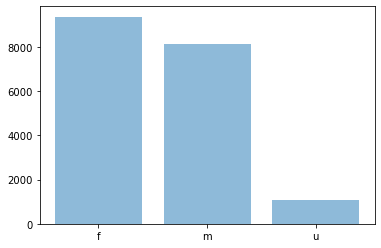

In [7]:
#ploting a graph for seeing gender in taken data
gender = ['f','m','u']
plt.bar(gender,Data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

In [8]:
#Now we start import necessary module for building model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [9]:
#Defining data that we are going to use like age,gender,bounding box of all image
imp_data = Data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
imp_data.info()

img_path = []
for row in Data.iterrows():
    path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

imp_data['img_path'] = img_path
imp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     19370 non-null  object
 1   gender  18591 non-null  object
 2   x       19370 non-null  int64 
 3   y       19370 non-null  int64 
 4   dx      19370 non-null  int64 
 5   dy      19370 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,AdienceBenchmarkGenderAndAgeClassification/fac...
1,"(25, 32)",m,301,105,640,641,AdienceBenchmarkGenderAndAgeClassification/fac...
2,"(25, 32)",f,2395,876,771,771,AdienceBenchmarkGenderAndAgeClassification/fac...
3,"(25, 32)",m,752,1255,484,485,AdienceBenchmarkGenderAndAgeClassification/fac...
4,"(25, 32)",m,175,80,769,768,AdienceBenchmarkGenderAndAgeClassification/fac...


In [10]:
#Now we are mapping age into age_mapping which age group it is like that and drop the data that does not contain the value
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(imp_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        imp_data.age.loc[idx] = age_mapping_dict[each]

imp_data = imp_data.drop(labels=drop_labels, axis=0) #droped None values
imp_data.age.value_counts(dropna=False)

C:\Users\mvsan\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [11]:
#we have 'u' unknown data that we drop from the data so we can use the cleaned data to train our model
imp_data = imp_data.dropna()
clean_data = imp_data[imp_data.gender != 'u'].copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [12]:
#We are mapping male as 1 and female as 0 for easy to access or easy way of doing in the code
gender_to_label_map = {'f' : 0,'m' : 1}
clean_data['gender'] = clean_data['gender'].apply(lambda g: gender_to_label_map[g])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,25-32,0,0,414,1086,1383,AdienceBenchmarkGenderAndAgeClassification/fac...
1,25-32,1,301,105,640,641,AdienceBenchmarkGenderAndAgeClassification/fac...
2,25-32,0,2395,876,771,771,AdienceBenchmarkGenderAndAgeClassification/fac...
3,25-32,1,752,1255,484,485,AdienceBenchmarkGenderAndAgeClassification/fac...
4,25-32,1,175,80,769,768,AdienceBenchmarkGenderAndAgeClassification/fac...


In [13]:
#mapping age from 0 to 7 so we will known the age of particular image taken.
age_to_label_map = {'0-2'  :0,'4-6'  :1,'8-13' :2,'15-20':3,'25-32':4,'38-43':5,'48-53':6,'60+'  :7}
clean_data['age'] = clean_data['age'].apply(lambda age: age_to_label_map[age])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,0,0,414,1086,1383,AdienceBenchmarkGenderAndAgeClassification/fac...
1,4,1,301,105,640,641,AdienceBenchmarkGenderAndAgeClassification/fac...
2,4,0,2395,876,771,771,AdienceBenchmarkGenderAndAgeClassification/fac...
3,4,1,752,1255,484,485,AdienceBenchmarkGenderAndAgeClassification/fac...
4,4,1,175,80,769,768,AdienceBenchmarkGenderAndAgeClassification/fac...


In [14]:
#Now we are creating training and test dataset with sklearn train and test split method and os to read the file from its location
import os
X = clean_data[['img_path']]
y = clean_data[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)
Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


In [15]:
#In this we are creating model
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 layer_normalization (LayerN  (None, 28, 28, 96)       192       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                        

In [16]:
#we train the model and saving the model as well
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, y_train, batch_size=32, epochs=25, validation_data=(test_images, y_test), callbacks=[callback])

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

model.save('gender_model25.h5')

Epoch 1/25


C:\Users\mvsan\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - ETA: 0s - loss: 0.9861 - accuracy: 0.5288

C:\Users\mvsan\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - 621s 2s/step - loss: 0.9861 - accuracy: 0.5288 - val_loss: 0.6926 - val_accuracy: 0.5241
Epoch 2/25
382/382 [==============================] - 1135s 3s/step - loss: 0.6902 - accuracy: 0.5393 - val_loss: 0.6926 - val_accuracy: 0.5241
Epoch 3/25
382/382 [==============================] - 636s 2s/step - loss: 0.6902 - accuracy: 0.5393 - val_loss: 0.6927 - val_accuracy: 0.5241
Epoch 4/25
382/382 [==============================] - 956s 3s/step - loss: 0.6903 - accuracy: 0.5393 - val_loss: 0.6921 - val_accuracy: 0.5241
Epoch 5/25
382/382 [==============================] - 639s 2s/step - loss: 0.6902 - accuracy: 0.5393 - val_loss: 0.6921 - val_accuracy: 0.5241
Epoch 6/25
382/382 [==============================] - 632s 2s/step - loss: 0.6902 - accuracy: 0.5393 - val_loss: 0.6922 - val_accuracy: 0.5241
Epoch 7/25
382/382 [==============================] - 697s 2s/step - loss: 0.6901 - accuracy: 0.5393 - val_loss: 0.6924 - val_accuracy: 0.5241
Epoch 8/2

In [17]:
#Now we create training and testing split for age data
X = clean_data[['img_path']]
y = clean_data[['age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)
Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


In [18]:
#Building age model
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=8, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 layer_normalization_3 (Laye  (None, 28, 28, 96)       192       
 rNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                      

In [19]:
#we train the model and saving the model as well
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # Callback for earlystopping
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, y_train, batch_size=32, epochs=50, validation_data=(test_images, y_test), callbacks=[callback])

model.save('age_model50.h5')

test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(test_acc)

Epoch 1/50


C:\Users\mvsan\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - ETA: 0s - loss: 2.2154 - accuracy: 0.2858

C:\Users\mvsan\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - 1820s 5s/step - loss: 2.2154 - accuracy: 0.2858 - val_loss: 1.9210 - val_accuracy: 0.2976
Epoch 2/50
382/382 [==============================] - 645s 2s/step - loss: 1.9228 - accuracy: 0.3014 - val_loss: 1.9209 - val_accuracy: 0.2976
Epoch 3/50
382/382 [==============================] - 628s 2s/step - loss: 1.9235 - accuracy: 0.3014 - val_loss: 1.9211 - val_accuracy: 0.2976
Epoch 4/50
382/382 [==============================] - 627s 2s/step - loss: 1.9225 - accuracy: 0.3014 - val_loss: 1.9212 - val_accuracy: 0.2976
Epoch 5/50
382/382 [==============================] - 629s 2s/step - loss: 1.9241 - accuracy: 0.3014 - val_loss: 1.9206 - val_accuracy: 0.2976
Epoch 6/50
382/382 [==============================] - 631s 2s/step - loss: 1.9236 - accuracy: 0.3014 - val_loss: 1.9216 - val_accuracy: 0.2976
Epoch 7/50
382/382 [==============================] - 629s 2s/step - loss: 1.9235 - accuracy: 0.3014 - val_loss: 1.9206 - val_accuracy: 0.2976
164/164 -